# Scipy

SciPy é uma coleção de algoritmos matemáticos e funções convenientes construídas em cima do **NumPy**. Adiciona significativo poder para a sessão Python proporcionando ao usuário comandos de alto nível e classes para manipular e visualizar dados.

* Pacote de Cluster (scipy.cluster)
* Constantes (scipy.constants)
* Transformada de Fourier discreta (scipy.fftpack)
* Integração numérica e solução de ODEs (scipy.integrate)
* **Interpolação (scipy.interpolate)**
* Input e output (scipy.io)
* Algebra linear (scipy.linalg)
* Rotinas diversas (scipy.misc)
* Processamento de imagens n-dimensionais (scipy.ndimage)
* <p><span style="color:red">Orthogonal distance regression (scipy.odr)</p>
* Optimização e solução de sistemas (scipy.optimize)
* Processamento de sinais (scipy.signal)
* <p><span style="color:red">Sparse matrices (scipy.sparse)</p>
* <p><span style="color:red">Sparse linear algebra (scipy.sparse.linalg)</p>
* <p><span style="color:red">Compressed Sparse Graph Routines (scipy.sparse.csgraph)</p>
* <p><span style="color:red">Spatial algorithms and data structures (scipy.spatial)</p>
* Funções especiais (scipy.special)
* **Funções estatísticas (scipy.stats)**
* Funções estatísticas para arrays mascarados (scipy.stats.mstats)
* <p><span style="color:red">Low-level callback functions</p>

## Interpolação

A classe `interp1d` permite que a partir de um conjunto de pontos nós possamos criar uma função de interpolação dentro desse domínio. Por exemplo:

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
% matplotlib inline

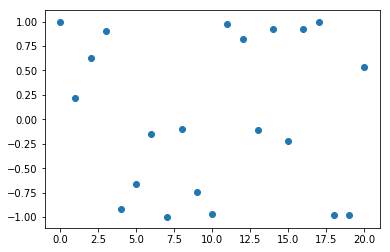

In [4]:
x = np.linspace(0, 20, 21)
y = np.cos((x * np.pi) ** 2 / 2)

plt.scatter(x, y)

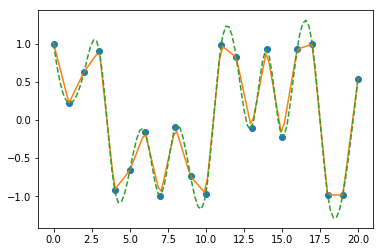

In [5]:
# função de interpolação default linear
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 20, 100)
plt.plot(x, y, 'o') 
plt.plot(xnew, f(xnew), '-') 
plt.plot(xnew, f2(xnew), '--')

<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Imagine que você tem uma série de dados de temperatura que possui várias falhas. Isso pode ser usado para preencher essas falhas de forma simples
</div>

Agora vamos tentar interpolar um campo de duas dimensões

In [6]:
from scipy.interpolate import interp2d

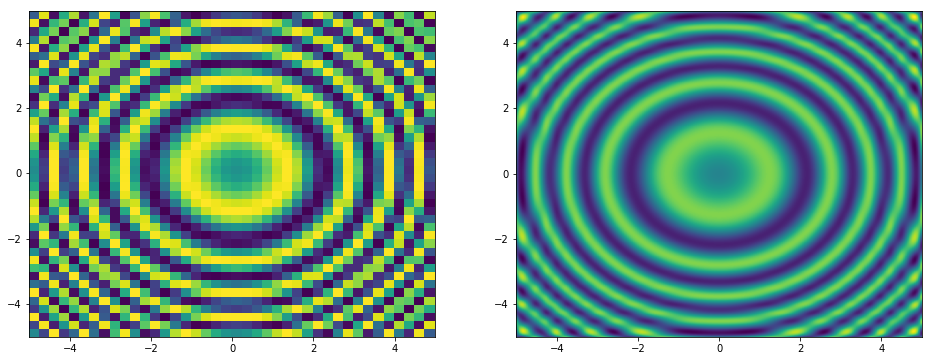

In [7]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)

z = np.sin(xx**2+yy**2)

# aumentamos a grade para pontos a cada 0.01
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
xxnew, yynew = np.meshgrid(xnew, ynew)

f = interp2d(x, y, z, kind='cubic')

znew = f(xnew, ynew)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,6))

ax1.pcolormesh(xx, yy, z)
ax2.pcolormesh(xxnew, yynew, znew)

<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Imagine que você tem dados observacionais em pontos de grade divididos em uma malha de 0.25° x 0.25° de lat/lon e quer comparar com o GFS de 1° x 1°. Dessa forma você pode reinterpolar seus dados observados para a grade do GFS de 1° x 1° para comparar de forma mais homogênea.
</div>

E se tivessemos dados não estruturados?

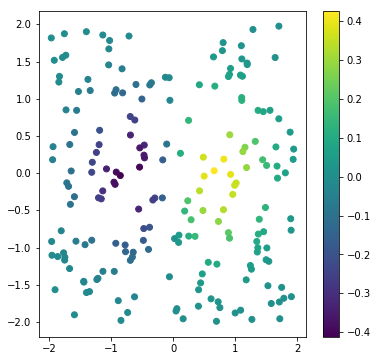

In [8]:
npts = 200

# pontos (coordeanadas)
x = np.random.uniform(-2,2,npts)
y = np.random.uniform(-2,2,npts)
# valor no dado ponto (ex: temperatura)
z = x*np.exp(-x**2-y**2)

fig, ax = plt.subplots(figsize=(6,6))

cf = ax.scatter(x, y, c=z)
fig.colorbar(cf, ax=ax)

In [9]:
from scipy.interpolate import griddata

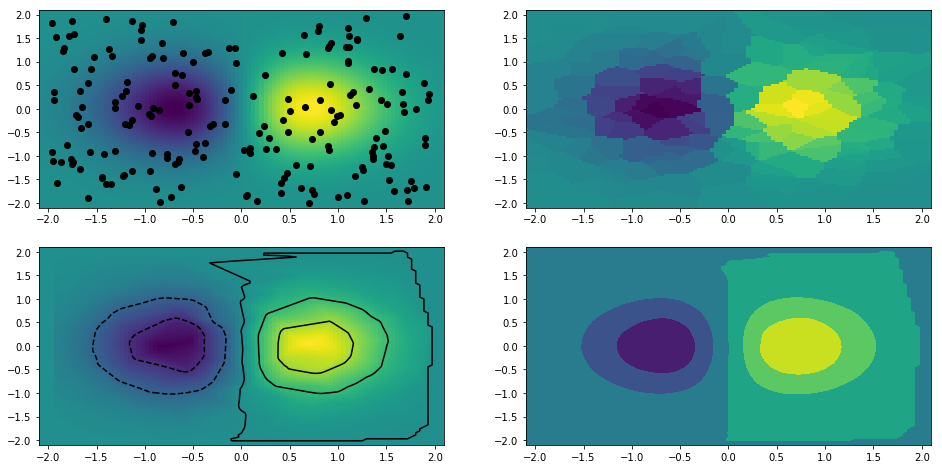

In [10]:
# minha grade
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
xx, yy = np.meshgrid(xi, yi)

grid_z0 = griddata((x, y), z, (xx, yy), method='nearest')
grid_z1 = griddata((x, y), z, (xx, yy), method='linear', fill_value=0)
grid_z2 = griddata((x, y), z, (xx, yy), method='cubic', fill_value=0)

fig, axarr = plt.subplots(2, 2, figsize=(16,8))

axarr[0, 0].pcolormesh(xx, yy, xx*np.exp(-xx**2-yy**2))
axarr[0, 0].scatter(x, y, color='k')
axarr[0, 1].pcolormesh(xx, yy, grid_z0)
axarr[1, 0].pcolormesh(xx, yy, grid_z1)
axarr[1, 0].contour(xx, yy, grid_z1, colors='k')
axarr[1, 1].contourf(xx, yy, grid_z2)

<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Imagine que você tem dados de temperatura de várias estações e quer
fazer uma mapa com esses dados em pontos de grade para talvez comparar com um modelo, ou simplesmente para 
facilitar a visualização.
</div>

## Estatística

O que temos de estatística no scipy? https://docs.scipy.org/doc/scipy/reference/stats.html

In [11]:
from scipy import stats

Text(0.5,1,u'Distribui\xe7\xe3o Uniforme')

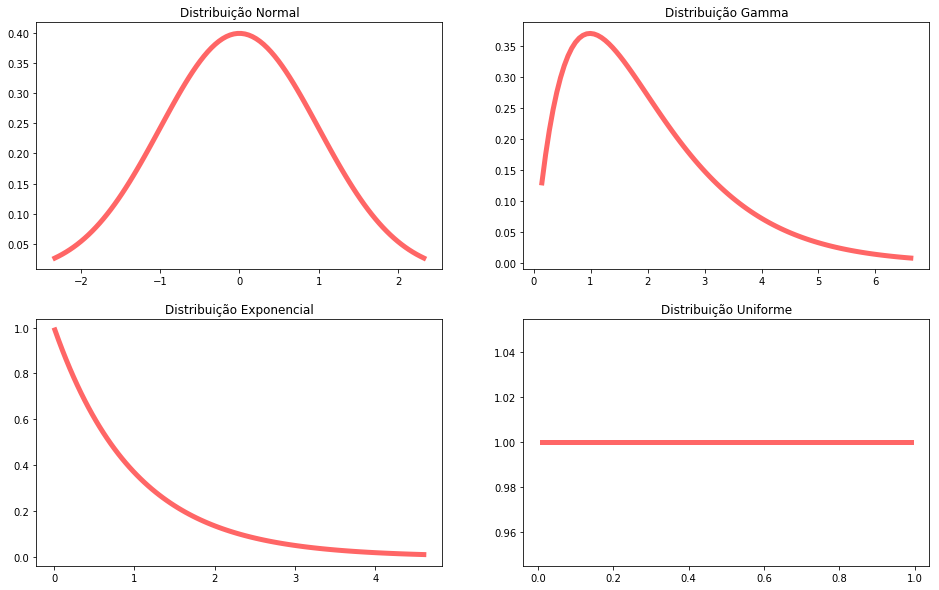

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(16,10))

# distribuição normal
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
axarr[0, 0].plot(x, stats.norm.pdf(x, loc=0, scale=1), c='r', lw=5, alpha=0.6, label='norm pdf')
axarr[0, 0].set_title(u'Distribuição Normal')

# distribuição gamma
x = np.linspace(stats.gamma.ppf(0.01, 1.99), stats.gamma.ppf(0.99, 1.99), 100)
axarr[0, 1].plot(x, stats.gamma.pdf(x, 1.99), c='r', lw=5, alpha=0.6, label='norm pdf')
axarr[0, 1].set_title(u'Distribuição Gamma')

# distribuição exponencial
x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99), 100)
axarr[1, 0].plot(x, stats.expon.pdf(x), c='r', lw=5, alpha=0.6, label='norm pdf')
axarr[1, 0].set_title(u'Distribuição Exponencial')

# distribuição uniforme
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
axarr[1, 1].plot(x, stats.uniform.pdf(x), c='r', lw=5, alpha=0.6, label='norm pdf')
axarr[1, 1].set_title(u'Distribuição Uniforme')

Algumas funções e testes úteis:

/home/rafael/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


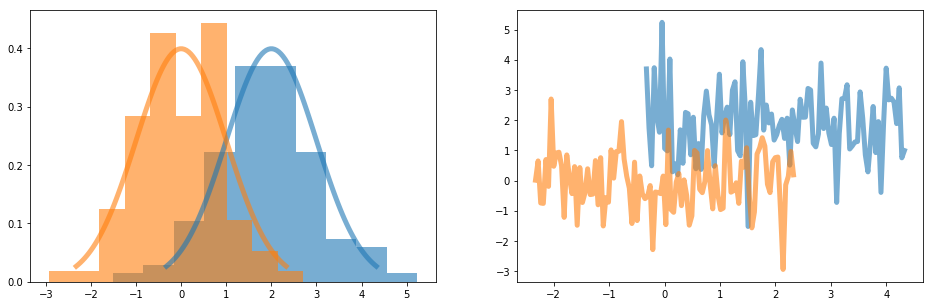

In [13]:
# criando duas distribuições normais com médias diferentes
x1 = np.linspace(stats.norm.ppf(0.01, loc=2, scale=1), stats.norm.ppf(0.99, loc=2, scale=1), 100)
y1 = np.random.normal(loc=2, scale=1, size=100)
x2 = np.linspace(stats.norm.ppf(0.01, loc=0, scale=1), stats.norm.ppf(0.99, loc=0, scale=1), 100) 
y2 = np.random.normal(loc=0, scale=1, size=100)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))

# plot em ax1 o histograma com a pdf
ax1.plot(x1, stats.norm.pdf(x1, loc=2, scale=1), c='C0', alpha=0.6, linewidth=5)
ax1.hist(y1, normed=True, color='C0', alpha=0.6)
ax1.plot(x2, stats.norm.pdf(x2), c='C1', alpha=0.6, linewidth=5)
ax1.hist(y2, normed=True, color='C1', alpha=0.6)

# plota em ax2 a série de dados
ax2.plot(x1, y1, color='C0', alpha=0.6, linewidth=5)
ax2.plot(x2, y2, color='C1', alpha=0.6, linewidth=5)

In [14]:
r, pvalue = stats.pearsonr(y1, y2)

print 'Coeficiente de correlação de pearson é:', r

Coeficiente de correlação de pearson é: 0.0559989564376


In [15]:
statistic, pvalue = stats.ttest_ind(y1, y2)

if pvalue > 0.05: # nível de significância
    print 'Não podemos rejeitar H_0, a hipótese que as distribuições tem médias idênticas pois pvalue =', pvalue
else:
    print 'Podemos rejeitar H_0, a hipótese que as distribuições tem médias idênticas pois pvalue =', pvalue

Podemos rejeitar H_0, a hipótese que as distribuições tem médias idênticas pois pvalue = 1.8737234562e-28


<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Em clima muitas vezes isso pode ser utilizado. Imagine que você quer estudar eventos de ZCAS, você separa todas as ocorrências desse fenômeno e quer comparar os padrões de circulação. Com todos os eventos de ZCAS comparando com os eventos de não ZCAS você consegue com isso identificar o quão significativa são as diferenças que você encontrou nos padrões atmosféricos.
</div>

In [16]:
statistic, pvalue = stats.kstest(y2, 'norm')

if pvalue > 0.05: # nível de significância
    print 'Não podemos rejeitar H_0, a hipótese de que y vem da distribuição N(0,1), pois pvalue =', pvalue
else:
    print 'Podemos rejeitar H_0, a hipótese de que y vem da distribuição N(0,1) pois pvalue =', pvalue

Não podemos rejeitar H_0, a hipótese de que y vem da distribuição N(0,1), pois pvalue = 0.752678897403


<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Testes de normalidade ou de outras distribuições geralmente são usados quando você precisa que determinada condição de distribuição seja satisfeita para que um modelo ou um teste seja feito. O caso do teste T indicado anteriormente pode ser usado como exemplo: para que ele possa ser utilizado é necessário que as distribuições sejam gaussianas.
</div>

In [17]:
statistic, pvalue = stats.ks_2samp(y1, y2)

if pvalue > 0.05: # nível de significância
    print 'Não podemos rejeitar H_0, a hipótese de que y1 vem da mesma distribuição que y2, pois pvalue =', pvalue
else:
    print 'Podemos rejeitar H_0, a hipótese de que y1 vem da mesma distribuição que y2 pois pvalue =', pvalue

Podemos rejeitar H_0, a hipótese de que y1 vem da mesma distribuição que y2 pois pvalue = 1.5734899709e-22


<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Imagine que você tem dados de temperatura de um modelo e das observações. Um jeito de avaliar o quão confiável o modelo é pode ser usando um teste desse tipo em que as distribuições de duas amostras são comparadas entre si.
</div>

# Pandas

Pandas é um pacote Python que proporciona estruturas de dados rápidas, flexivas e expressivas, desenhadas para fazer trabalhar com dados "relacionais" ou "nomeados" fácil e inuitivo. Pandas é usado para diferentes tipos de dados:

- Dados tabelados como SQL e Excel
- Séries temporais ordenadas ou não ordenadas
- Matrizes com nomes nas colunas e linhas
- Qualquer tipo de dado que seja nomeado

(http://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

In [18]:
import pandas as pd

`Series` é um array unidimensional capaz de receber dado de qualquer tipo (inteiro, strings, float, objetos, etc.). Os nomes nos eixo são geralmente chamados de índice ou index. O método para se criar uma série é:

In [19]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

`DataFrame` é uma estrutura de dados bidimensional nomeada (labeled) com colunas que podem ser de tipos diferentes. Você pode pensar nele como uma planolha de Excel ou uma tabela SQL, ou um dicionário com várias `Series`. É o objeto mais usado no pandas. Assim como `Series`, o `DataFrame` também consegue receber vários tipos diferentes de dados. 

In [20]:
dates = pd.date_range('20130101', periods=6, freq='M')

print 'dates = ', dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])

df

dates =  DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30'],
              dtype='datetime64[ns]', freq='M')


,A,B,C,D
2013-01-31,-1.772583,-1.302888,-1.441695,0.830521
2013-02-28,-1.344955,0.096718,1.918988,-1.626316
2013-03-31,0.655374,1.510652,0.305478,0.916123
2013-04-30,0.202767,-2.160308,0.934039,0.178756
2013-05-31,-0.460559,-0.410025,0.204910,0.413112
2013-06-30,-0.478832,-0.170510,0.087304,0.273725


In [21]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})


df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Para abrir arquivos geralmente usamos o comando `pd.read_csv()`. Esse comando pode ser usado para qualquer tipo de arquivo texto, não necessariamente apenas os que terminam com `.csv`. Vamos usar como exemplo a série histórica da estação Mirante de Santana do INMET que está na pasta **data**. O método `read_csv` tem os seguintes argumentos:

`pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)`

(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [28]:
df = pd.read_csv('data/inmconv_83781.csv', index_col=0, parse_dates=True)

df.head()

,Estacao,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Insolacao
Data_Hora,,,,,,,,,,,
1961-01-01 00:00:00,83781,NaN,NaN,NaN,24.9,NaN,NaN,NaN,NaN,NaN,2.1
1961-01-01 12:00:00,83781,0.0,21.7,20.2,NaN,18.5,88.0,919.5,32.0,5.7,NaN
1961-01-01 18:00:00,83781,NaN,24.8,21.5,NaN,NaN,74.0,917.6,27.0,6.7,NaN
1961-02-01 00:00:00,83781,NaN,20.5,20.2,22.7,NaN,97.0,919.2,32.0,2.6,0.1
1961-02-01 12:00:00,83781,5.0,21.6,20.6,NaN,19.7,91.0,918.4,32.0,6.2,NaN


In [29]:
df.tail()

,Estacao,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Insolacao
Data_Hora,,,,,,,,,,,
2010-02-11 12:00:00,83781,0.0,18.2,NaN,NaN,16.1,75.0,925.1,14.0,3.08664,NaN
2010-02-11 18:00:00,83781,NaN,25.4,NaN,NaN,NaN,31.0,921.8,5.0,1.54332,NaN
2010-03-11 00:00:00,83781,NaN,18.5,NaN,NaN,NaN,79.0,923.2,14.0,2.05776,NaN
2010-03-11 12:00:00,83781,0.0,20.9,NaN,NaN,15.7,63.0,924.0,9.0,1.02888,NaN
2010-03-11 18:00:00,83781,NaN,26.0,NaN,NaN,NaN,49.0,921.8,18.0,1.02888,NaN


In [30]:
df.describe()

,Estacao,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Insolacao
count,53406.0,17901.000000,53254.000000,53151.000000,17648.000000,17649.000000,53253.000000,53142.000000,53254.000000,53237.000000,12604.000000
mean,83781.0,4.202899,20.609053,17.388713,25.303660,15.743056,74.485043,926.117195,16.145604,2.605668,5.459672
std,0.0,10.580240,4.599772,3.179193,4.325295,3.362318,16.552312,3.793762,11.052833,1.712038,3.565008
min,83781.0,0.000000,3.400000,2.000000,10.200000,0.800000,10.000000,911.700000,0.000000,0.000000,0.000000
25%,83781.0,0.000000,17.400000,15.200000,22.400000,13.400000,64.000000,923.500000,9.000000,1.500000,2.100000
50%,83781.0,0.000000,20.500000,17.600000,25.700000,16.000000,79.000000,925.900000,14.000000,2.500000,6.100000
75%,83781.0,2.200000,23.600000,19.900000,28.600000,18.400000,87.000000,928.700000,27.000000,3.600000,8.500000
max,83781.0,151.800000,34.700000,28.000000,37.000000,24.100000,100.000000,963.400000,36.000000,14.000000,13.000000


In [31]:
df.index

DatetimeIndex(['1961-01-01 00:00:00', '1961-01-01 12:00:00',
               '1961-01-01 18:00:00', '1961-02-01 00:00:00',
               '1961-02-01 12:00:00', '1961-02-01 18:00:00',
               '1961-03-01 00:00:00', '1961-03-01 12:00:00',
               '1961-03-01 18:00:00', '1961-04-01 00:00:00',
               ...
               '2010-10-31 18:00:00', '2010-01-11 00:00:00',
               '2010-01-11 12:00:00', '2010-01-11 18:00:00',
               '2010-02-11 00:00:00', '2010-02-11 12:00:00',
               '2010-02-11 18:00:00', '2010-03-11 00:00:00',
               '2010-03-11 12:00:00', '2010-03-11 18:00:00'],
              dtype='datetime64[ns]', name=u'Data_Hora', length=53406, freq=None)

In [32]:
df.columns

Index([u'Estacao', u'Precipitacao', u'TempBulboSeco', u'TempBulboUmido',
       u'TempMaxima', u'TempMinima', u'UmidadeRelativa', u'PressaoAtmEstacao',
       u'DirecaoVento', u'VelocidadeVento', u'Insolacao'],
      dtype='object')

In [34]:
df['Precipitacao'].head()

Data_Hora
1961-01-01 00:00:00    NaN
1961-01-01 12:00:00    0.0
1961-01-01 18:00:00    NaN
1961-02-01 00:00:00    NaN
1961-02-01 12:00:00    5.0
Name: Precipitacao, dtype: float64

In [39]:
df.sort_values('Precipitacao', ascending=False).head(6)

,Estacao,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Insolacao
Data_Hora,,,,,,,,,,,
1988-12-21 12:00:00,83781,151.8,20.4,19.8,NaN,19.0,94.0,923.1,0.0,0.0,NaN
2005-05-25 12:00:00,83781,140.4,16.8,16.1,NaN,15.2,89.0,919.3,32.0,3.3,NaN
1991-01-16 12:00:00,83781,106.4,21.8,20.0,NaN,19.9,85.0,918.8,36.0,1.8,NaN
1994-11-03 12:00:00,83781,106.2,21.8,20.4,NaN,17.4,88.0,925.7,0.0,0.0,NaN
1977-01-19 12:00:00,83781,103.5,20.3,19.8,NaN,19.0,95.0,917.0,27.0,0.3,NaN
2007-08-02 12:00:00,83781,103.3,22.6,21.8,NaN,20.7,93.0,926.0,18.0,1.0,NaN


Você pode selecionar os dados pelas labels do índice

In [42]:
df['19800101':'19800105']

,Estacao,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Insolacao
Data_Hora,,,,,,,,,,,
1980-01-01 00:00:00,83781,NaN,20.9,20.2,20.8,NaN,94.0,918.5,18.0,1.6,0.0
1980-01-01 12:00:00,83781,17.7,15.4,14.6,NaN,14.9,92.0,920.8,23.0,1.6,NaN
1980-01-01 18:00:00,83781,NaN,19.4,17.0,NaN,NaN,78.0,919.7,18.0,1.5,NaN
1980-01-02 00:00:00,83781,NaN,19.6,19.0,28.8,NaN,94.0,918.8,27.0,1.0,6.9
1980-01-02 12:00:00,83781,13.1,24.0,22.0,NaN,18.0,84.0,917.4,5.0,2.0,NaN
1980-01-02 18:00:00,83781,NaN,28.6,23.2,NaN,NaN,63.0,920.3,32.0,3.3,NaN
1980-01-03 00:00:00,83781,NaN,26.0,23.7,31.3,NaN,82.0,925.3,18.0,1.8,10.6
1980-01-03 12:00:00,83781,0.0,24.6,21.4,NaN,20.2,73.0,927.6,9.0,1.6,NaN
1980-01-03 18:00:00,83781,NaN,30.8,22.4,NaN,NaN,47.0,925.1,36.0,1.0,NaN


In [50]:
df.loc['2000-01-01', ['TempMaxima', 'TempMinima']]

,TempMaxima,TempMinima
Data_Hora,,
2000-01-01 00:00:00,24.7,NaN
2000-01-01 12:00:00,NaN,19.7
2000-01-01 18:00:00,NaN,NaN


Ou pelo índice:

In [59]:
df.iloc[9:12, [4, 5]]

,TempMaxima,TempMinima
Data_Hora,,
1961-04-01 00:00:00,27.2,NaN
1961-04-01 12:00:00,NaN,18.7
1961-04-01 18:00:00,NaN,NaN


Ou mesmo por booleano

In [60]:
df['Precipitacao'] > 1 

Data_Hora
1961-01-01 00:00:00    False
1961-01-01 12:00:00    False
1961-01-01 18:00:00    False
1961-02-01 00:00:00    False
1961-02-01 12:00:00     True
1961-02-01 18:00:00    False
1961-03-01 00:00:00    False
1961-03-01 12:00:00     True
1961-03-01 18:00:00    False
1961-04-01 00:00:00    False
1961-04-01 12:00:00    False
1961-04-01 18:00:00    False
1961-05-01 00:00:00    False
1961-05-01 12:00:00     True
1961-05-01 18:00:00    False
1961-06-01 00:00:00    False
1961-06-01 12:00:00    False
1961-06-01 18:00:00    False
1961-07-01 00:00:00    False
1961-07-01 12:00:00     True
1961-07-01 18:00:00    False
1961-08-01 00:00:00    False
1961-08-01 12:00:00     True
1961-08-01 18:00:00    False
1961-09-01 00:00:00    False
1961-09-01 12:00:00    False
1961-09-01 18:00:00    False
1961-10-01 00:00:00    False
1961-10-01 12:00:00    False
1961-10-01 18:00:00    False
                       ...  
2010-10-25 00:00:00    False
2010-10-25 12:00:00    False
2010-10-25 18:00:00    False
2010

In [62]:
df[df['Precipitacao'] > 1].describe()

,Estacao,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Insolacao
count,5134.0,5134.000000,5107.000000,5099.000000,0.0,5033.000000,5107.000000,5086.000000,5108.000000,5106.000000,0.0
mean,83781.0,14.526042,19.794870,18.000157,NaN,16.917266,84.393382,925.374951,16.860415,2.288113,NaN
std,0.0,15.519125,3.485199,2.876227,NaN,2.860452,8.676732,3.406390,12.232599,1.639290,NaN
min,83781.0,1.100000,3.400000,2.000000,NaN,1.200000,42.000000,913.000000,0.000000,0.000000,NaN
25%,83781.0,3.700000,17.400000,16.200000,NaN,15.100000,79.000000,923.100000,5.000000,1.000000,NaN
50%,83781.0,9.300000,20.300000,18.800000,NaN,17.600000,86.000000,925.200000,14.000000,2.000000,NaN
75%,83781.0,19.600000,22.400000,20.200000,NaN,19.100000,91.000000,927.500000,32.000000,3.300000,NaN
max,83781.0,151.800000,28.900000,23.400000,NaN,23.200000,100.000000,962.100000,36.000000,12.000000,NaN


<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Qualquer tipo de série temporal. Você pode estar interessado apenas em casos de chuva ou temperatura acima de um limiar particular. Isso pode ser um valor numérico ou mesmo um percentil, por exemplo.
</div>

## Preenchendo Falhas

In [75]:
df_tmax = df['TempMaxima'].to_frame() # vamos usar a temperatura máxima apenas por enquanto

df_tmax.dropna().head()

,TempMaxima
Data_Hora,
1961-01-01,24.9
1961-02-01,22.7
1961-03-01,28.5
1961-04-01,27.2
1961-05-01,25.8


In [76]:
df_tmax.fillna(value=999).head() # argumento inplace=True é o mesmo que df_tmax = df_tmax.dropna()

,TempMaxima
Data_Hora,
1961-01-01 00:00:00,24.9
1961-01-01 12:00:00,999.0
1961-01-01 18:00:00,999.0
1961-02-01 00:00:00,22.7
1961-02-01 12:00:00,999.0


In [82]:
df_tmax.fillna(method='ffill').head()

,TempMaxima
Data_Hora,
1961-01-01 00:00:00,24.9
1961-01-01 12:00:00,24.9
1961-01-01 18:00:00,24.9
1961-02-01 00:00:00,22.7
1961-02-01 12:00:00,22.7


Podemos interpolar também: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate

In [81]:
df_tmax.interpolate(method='linear').head()

,TempMaxima
Data_Hora,
1961-01-01 00:00:00,24.900000
1961-01-01 12:00:00,24.166667
1961-01-01 18:00:00,23.433333
1961-02-01 00:00:00,22.700000
1961-02-01 12:00:00,24.633333


<div class="alert alert-block alert-danger">
<b>Atenção:</b> Aqui existe uma diferença importante entre usar o pandas e o numpy. O pandas não considera as falhas, ou seja, os NaN nos cálculos (médias, cálculo de percentis, etc.). Dessa forma, suponha que você tenha 1000 dados na sua série e 100 faltantes, e quer calcular uma média. Esse valor será calculado com relação à esses 900 dados da série e não aos 1000. Já abrindo o arquivo diretamente no numpy ele não entende o que são os dados faltantes, logo qualquer operação feita com dados faltantes retornará NaN.
</div>

## Resampling dos dados

Lidando com séries temporais geralmente estamos interessados em médias, máximos, mínimos, percentis diários, mensais, climatológicos. O pandas tem funções bem práticas para isso:

In [85]:
df_tmax.dropna(inplace=True) # removendo os missing data

# versões mais antigas do pandas devem ser escritas como df_tmax.resample('M', how='mean')
df_tmax_month = df_tmax.resample('M').mean() # pode ser substituido por min, max, sum, por exemplo.

df_tmax_month.head()

,TempMaxima
Data_Hora,
1961-01-31,26.538710
1961-02-28,26.025000
1961-03-31,26.077419
1961-04-30,25.383333
1961-05-31,24.329032


In [87]:
df_tmax.resample('AS').max().head()

,TempMaxima
Data_Hora,
1961-01-01,35.2
1962-01-01,33.0
1963-01-01,34.5
1964-01-01,32.7
1965-01-01,33.5


Podemos calcular uma climatologia dos dados também com a função `groupby` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [106]:
df_clim = df_tmax['1961':'1990'] # geralmente usamos 1961 a 1990 como base para a climatologia

df_clim.groupby(df_clim.index.month).mean()

,TempMaxima
Data_Hora,
1,26.622210
2,26.607268
3,26.194508
4,24.779457
5,23.553975
6,22.957986
7,23.142360
8,24.042873
9,24.513064


## Funções úteis para plots com o pandas

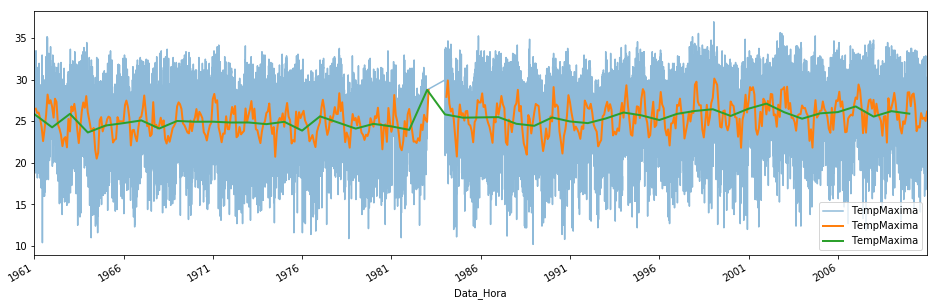

In [104]:
fig, ax = plt.subplots(figsize=(16,5))

df_tmax.plot(ax=ax, alpha=0.5)
df_tmax.resample('M').mean().plot(ax=ax, linewidth=2)
df_tmax.resample('AS').mean().plot(ax=ax, linewidth=2)

Para a precipitação por exemplo

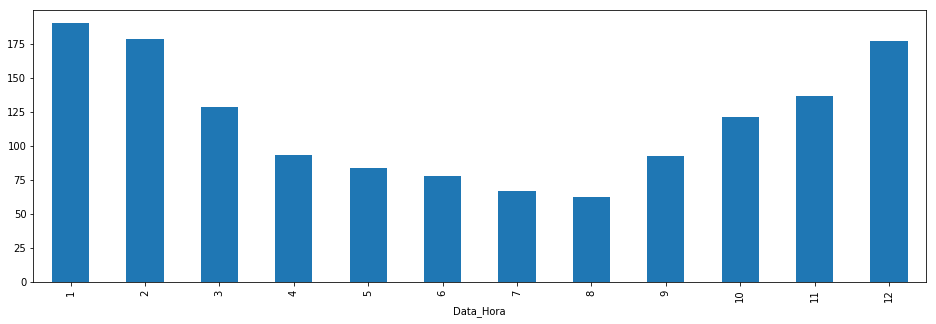

In [110]:
df_prec_month = df.loc['1961':'1990', 'Precipitacao'].resample('M').sum()
df_clim = df_prec_month.groupby(df_prec_month.index.month).mean()

fig, ax = plt.subplots(figsize=(16,5))

df_clim.plot(kind='bar')